# Zomato Data Analysis Project

## Step 1 - Importing Libraries

In [3]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

                                              0.0/11.6 MB ? eta -:--:--
                                              0.0/11.6 MB ? eta -:--:--
                                             0.0/11.6 MB 131.3 kB/s eta 0:01:29
                                             0.0/11.6 MB 131.3 kB/s eta 0:01:29
                                             0.0/11.6 MB 119.1 kB/s eta 0:01:38
                                             0.1/11.6 MB 187.0 kB/s eta 0:01:02
                                             0.1/11.6 MB 204.8 kB/s eta 0:00:57
                                             0.1/11.6 MB 261.7 kB/s eta 0:00:45
                                             0.1/11.6 MB 370.8 kB/s eta 0:00:31
                                             0.2/11.6 MB 479.2 kB/s eta 0:00:24
                                             0.2/11.6 MB 497.3 kB/s eta 0:00:23
     -                                       0.3/11.6 MB 614.4 kB/s eta 0:00:19
     -                                       0.4/11.6 MB

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2 - Create the Data Frame

In [5]:
dataframe = pd.read_csv("Zomato data.csv")
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


## Convert the data type of column - rate

In [6]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

dataframe['rate'] = dataframe['rate'].apply(handleRate)
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# Type of restaurant

Text(0.5, 0, 'Type of restaurant')

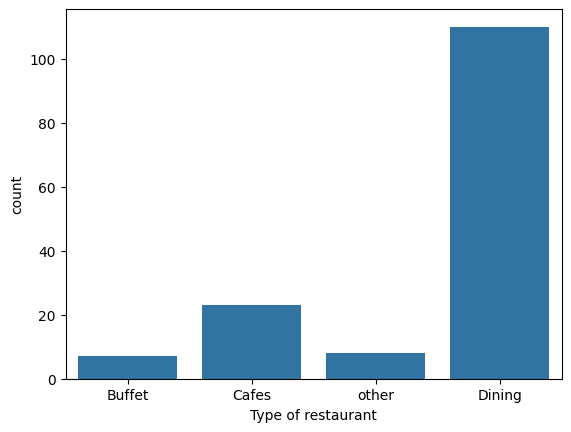

In [8]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")

##### Conclusion - majority of the restaurant falls in dinning category

Text(0, 0.5, 'Votes')

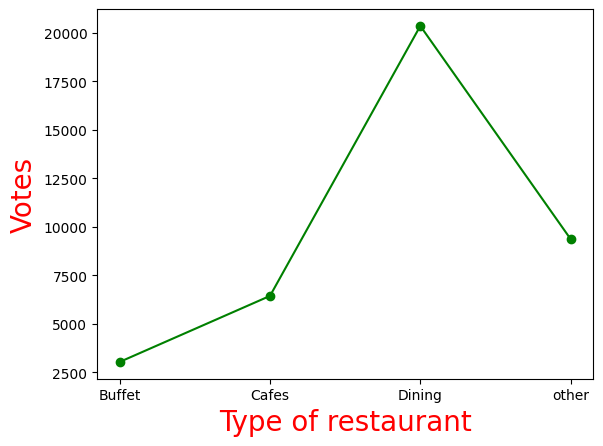

In [13]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result,c="green",marker="o")
plt.xlabel("Type of restaurant",c="red",size=20)
plt.ylabel("Votes",c="red",size=20)

##### Conclusion - dinning restaurants has recieved maxmium votes

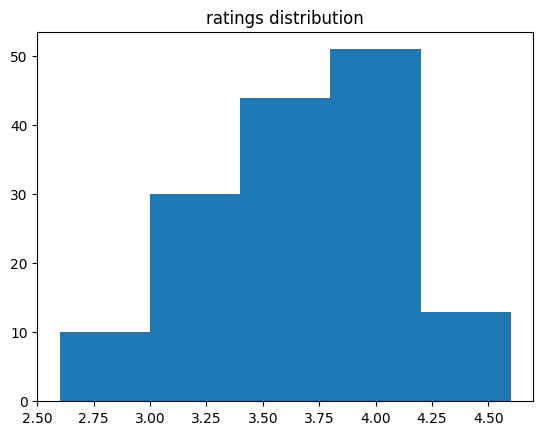

In [21]:
plt.hist(dataframe['rate'],bins=5)
plt.title("ratings distribution")
plt.show()

##### conclusion - the majority restaurants recevied from 3.5 to 4

## Average order spending by couples

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

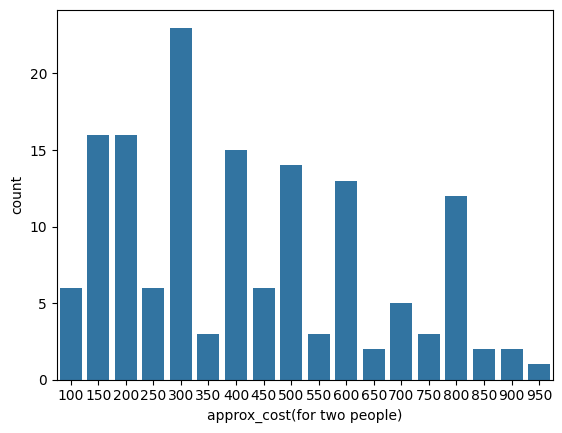

In [22]:
couple_data = dataframe["approx_cost(for two people)"]
sns.countplot(x=couple_data)

##### conclusion - the majority of couples prefer restaurants with an approximate cost 300 rupees

### which mode receives maximum rating

<Axes: xlabel='online_order', ylabel='rate'>

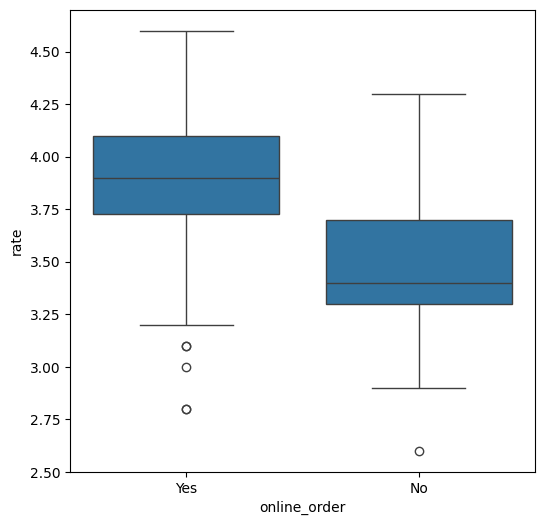

In [24]:
plt.figure(figsize = (6,6))
sns.boxplot(x= 'online_order',y='rate',data=dataframe)

#### conclusion - offline order recevied lower rating in comparison to online order

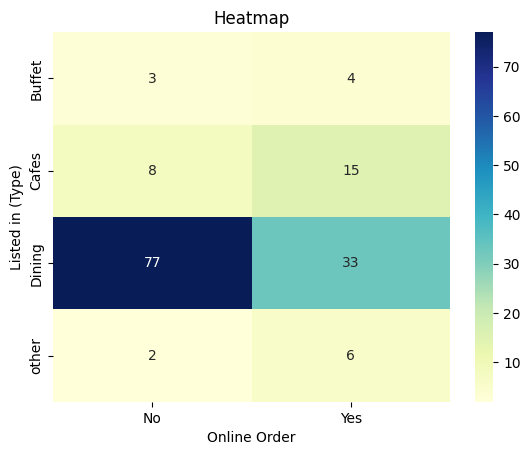

In [26]:
pivot_table = dataframe.pivot_table(index = "listed_in(type)",columns ='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table, annot =True,cmap="YlGnBu",fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed in (Type)")
plt.show()

##### Conclusion - Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to orders in person at the restaurants, but perfer online ordering at cafes.